## Lecture 01/27/2025
### PDEs and Boundary Value Problems

#### P1: Laplace's Equation (potential box, 3 walls $V=0$, top wall $V=1$
Copying the file 06_laplace.py...

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 3e-4   # Target accuracy

# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phi[0,:] = V  # top wall
phiprime = np.zeros([M+1,M+1],float)






# Main loop

delta = 1.0
iteration = 0
while delta>target:

    ## ARRAY ARITHMETIC WAY

    phiprime[0,:] = phi[0,:]
    phiprime[-1,:] = phi[-1,:]
    phiprime[:,0] = phi[:,0]
    phiprime[:,-1] = phi[:,-1]
    
    phiprime[1:M,1:M] = (1./4.) * (phi[2:,1:M] + phi[:M-1,1:M] + phi[1:M,2:] + phi[1:M,:M-1])


    # # Calculate new values of the potential
    # for i in range(M+1):
    #     for j in range(M+1):
    #         #
    #         # Complete in-class for phiprime, the updated solution
    #         # Remember to keep the boundaries at zero
    #         phiprime[i,j] = 1./4. ( phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]

    # Calculate maximum difference from old values
    delta = np.max(abs(phi-phiprime))
    if iteration % 10 == 0:
        print("Iteration %3d: max. residual = %12.6g" % (iteration, delta))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    iteration += 1




Iteration   0: max. residual =         0.25
Iteration  10: max. residual =    0.0215626
Iteration  20: max. residual =    0.0114888
Iteration  30: max. residual =   0.00782563
Iteration  40: max. residual =   0.00585664
Iteration  50: max. residual =   0.00475146
Iteration  60: max. residual =   0.00394522
Iteration  70: max. residual =   0.00341197
Iteration  80: max. residual =   0.00297969
Iteration  90: max. residual =   0.00265807
Iteration 100: max. residual =   0.00239706
Iteration 110: max. residual =   0.00217305
Iteration 120: max. residual =   0.00199968
Iteration 130: max. residual =   0.00184798
Iteration 140: max. residual =   0.00171304
Iteration 150: max. residual =   0.00160144
Iteration 160: max. residual =    0.0015037
Iteration 170: max. residual =   0.00141463
Iteration 180: max. residual =   0.00133415
Iteration 190: max. residual =   0.00126678
Iteration 200: max. residual =   0.00120432
Iteration 210: max. residual =   0.00114638
Iteration 220: max. residual =  

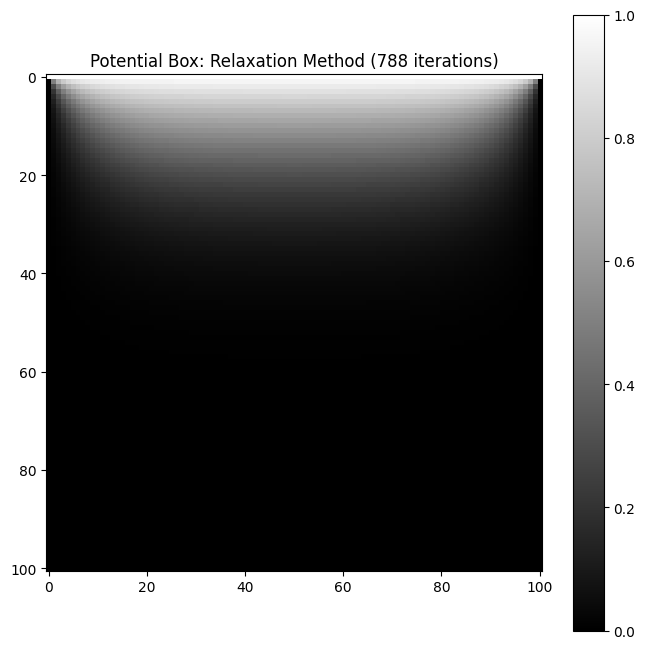

In [20]:
# Make a plot
fig, ax = plt.subplots(figsize=(8,8))
f1 = ax.imshow(phi)
fig.colorbar(f1)
plt.gray()
plt.title('Potential Box: Relaxation Method ('+str(iteration)+' iterations)')
plt.show()

/var/folders/vh/fbmpx7b10m119z9xwsbh66cw0000gn/T/ipykernel_95588/505513203.py:3: RuntimeWarning: divide by zero encountered in log
  f1 = ax.imshow(np.log(phi), cmap = 'inferno')


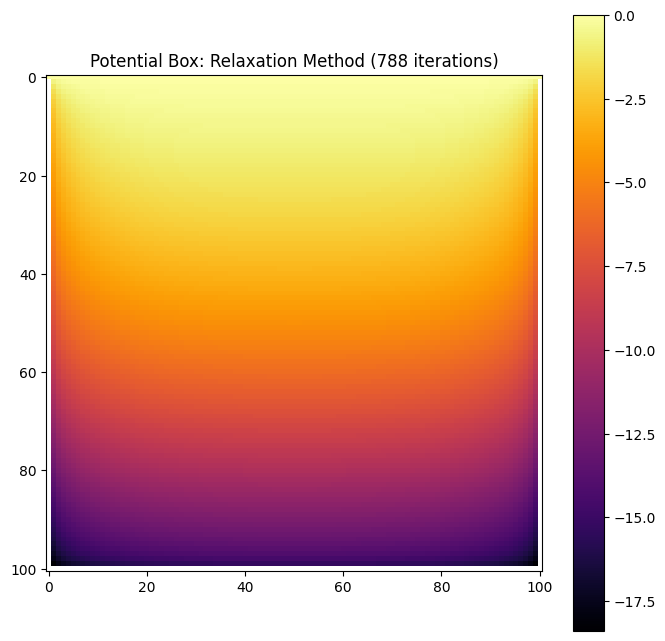

In [23]:
# Make a plot
fig, ax = plt.subplots(figsize=(8,8))
f1 = ax.imshow(np.log(phi), cmap = 'inferno')
fig.colorbar(f1)
plt.title('Potential Box: Relaxation Method ('+str(iteration)+' iterations)')
plt.show()

#### P2: Poissons's Equation (potential box, 4 walls $V=0$, nonzero charge density
Copying the file 06_poisson.py...

-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
-45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299435
45197740.11299

) missing from current font.ramework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


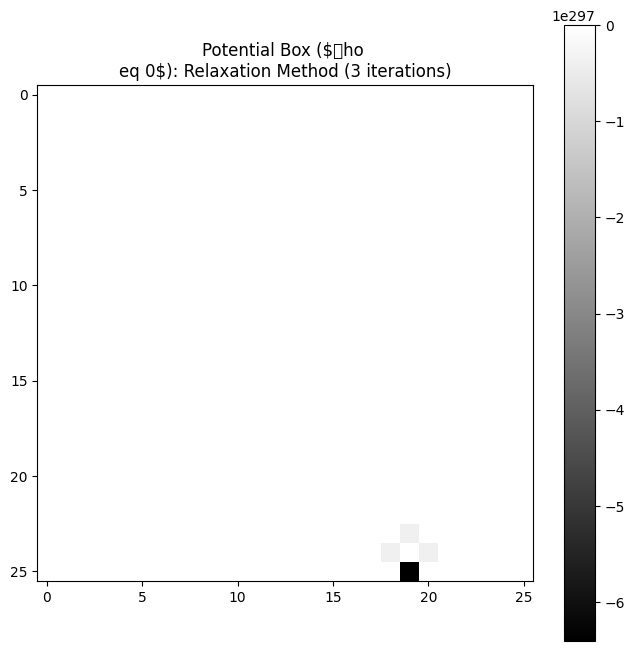

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M = 25         # Grid squares on a side
V = 0.0         # Voltage at top wall
L = 1.0         # Side length of box
target = 3e-4   # Target accuracy
epsilon_0 = 8.85e-12
a = L / float(M) # grid point spacing



# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = np.empty([M+1,M+1],float)

# Create surface charge density array
rho_values = [-1.0, 1.0]  # Surface charge density
charge_width = [0.2, 0.2] # Width of the charges (assuming squares)
charge_boundaries = [[0.2, 0.2], [0.6, 0.6]] # Position of origin of the charges
# rho = np.zeros([M+1,M+1], float)
# #for i in range(len(rho_values)):
#     #
#     # Complete in-class. Define rho (source/sink term)
#     # Fill in the charged squares with the appropriate density
#     #
source_const = (a ** 2.)/(4.*epsilon_0)
# Main loop
delta = 1.0
iteration = 0


while delta>target:
    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            #
            # Complete in-class for phiprime, the updated solution
            # Remember to keep the boundaries at zero and 
            # to include the sink/source term
            #
            x = i*a
            y = j*a
            source_term = 0.
            if (x > charge_boundaries[0][0] and x < charge_boundaries[0][0] + charge_width[0]) or (x > charge_boundaries[1][0] and x < charge_boundaries[1][0] + charge_width[0]):
                if (y > charge_boundaries[0][1] and y < charge_boundaries[0][1] + charge_width[1]) or (y > charge_boundaries[1][0] and y < charge_boundaries[1][0] + charge_width[1]):
                    if x < 0.5:
                        rho_local = rho_values[0]
                    else:
                        rho_local = rho_values[1]

                    source_term = source_const * rho_local
            phiprime[1:M,1:M] = (1./4.) * (phi[2:,1:M] + phi[:M-1,1:M] + phi[1:M,2:] + phi[1:M,:M-1]) + source_term
            

    # Calculate maximum fractional difference from old values
    delta = np.abs(phi-phiprime)
    nonzero = phi > 0
    if nonzero.any():
        #delta = np.max(delta[nonzero] / phi[nonzero])
        delta = np.max(delta[nonzero])
    else:
        delta = 1.0
    if iteration % 10 == 0:
        print("Iteration %3d: max. residual = %12.6g" % (iteration, delta))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    iteration += 1

# Make a plot
fig, ax = plt.subplots(figsize=(8,8))
f1 = ax.imshow(phi)
fig.colorbar(f1)
plt.gray()
plt.title('Potential Box ($\rho \neq 0$): Relaxation Method ('+str(iteration)+' iterations)')
plt.show()